In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
 
torch.manual_seed(1) 

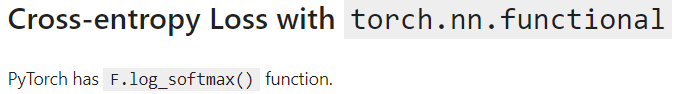

In [2]:
z = torch.rand(3, 5, requires_grad=True)
hypothesis = F.softmax(z, dim=1)
y = torch.randint(5, (3,)).long()
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [3]:
# Low level
torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [4]:
# High level
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

In [5]:
# Low level
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [6]:
# High level
F.nll_loss(F.log_softmax(z, dim=1), y.long())

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [7]:
F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [9]:
# Data

xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)

x_train = torch.FloatTensor(xy[:, 0:-1])
y_train = torch.LongTensor(xy[:, [-1]]).squeeze()

print(x_train.shape) # x_train shape
print(len(x_train))  # x_train 길이
print(x_train[:5])   # 첫 다섯 개

print()

print(y_train.shape) # y_train shape
print(len(y_train))  # y_train 길이
print(y_train[:5])   # 첫 다섯 개

nb_classes = 7
y_one_hot = torch.zeros((len(y_train), nb_classes))
y_one_hot = y_one_hot.scatter(1, y_train.unsqueeze(1), 1)

torch.Size([101, 16])
101
tensor([[1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 4., 0., 0., 1.],
        [1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 4., 1., 0., 1.],
        [0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.],
        [1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 4., 0., 0., 1.],
        [1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 4., 1., 0., 1.]])

torch.Size([101])
101
tensor([0, 0, 3, 0, 0])


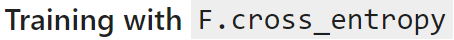

In [10]:
# 모델 초기화
W = torch.zeros((16, 7), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산 (2)
    z = x_train.matmul(W) + b # or .mm or @
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.945910
Epoch  100/1000 Cost: 0.471836
Epoch  200/1000 Cost: 0.326327
Epoch  300/1000 Cost: 0.257839
Epoch  400/1000 Cost: 0.215762
Epoch  500/1000 Cost: 0.186603
Epoch  600/1000 Cost: 0.164898
Epoch  700/1000 Cost: 0.147955
Epoch  800/1000 Cost: 0.134279
Epoch  900/1000 Cost: 0.122962
Epoch 1000/1000 Cost: 0.113422


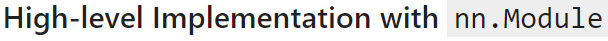

In [11]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(16, 7)
    def forward(self, x):
        return self.linear(x)
    
model = SoftmaxClassifierModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.919160
Epoch  100/1000 Cost: 0.468405
Epoch  200/1000 Cost: 0.320585
Epoch  300/1000 Cost: 0.248953
Epoch  400/1000 Cost: 0.204819
Epoch  500/1000 Cost: 0.174506
Epoch  600/1000 Cost: 0.152248
Epoch  700/1000 Cost: 0.135139
Epoch  800/1000 Cost: 0.121543
Epoch  900/1000 Cost: 0.110461
Epoch 1000/1000 Cost: 0.101245
